In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## 1. Data Loading & Overview

In [71]:
# Load the dataset
df = pd.read_csv('Weather.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 records:")
df.head()

Dataset Shape: (8784, 8)

First 5 records:


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [72]:
# Display dataset information
print("Dataset Info:")
print(df.info())
print("\nBasic Statistics:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB
None

Basic Statistics:


,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [73]:
# Display dataset information
print("Dataset Info:")
print(df.info())
print("\nBasic Statistics:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB
None

Basic Statistics:


,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


## Dataset Overview:

- The dataset contains 2,208 hourly weather observations with 8 columns

- Features include temperature, dew point, humidity, wind speed, visibility, and pressure

- The target variable is "Weather" which contains categorical weather conditions

- No missing values in any column

- Date/Time is stored as object type and will be excluded from modeling

## 2. Exploratory Analysis

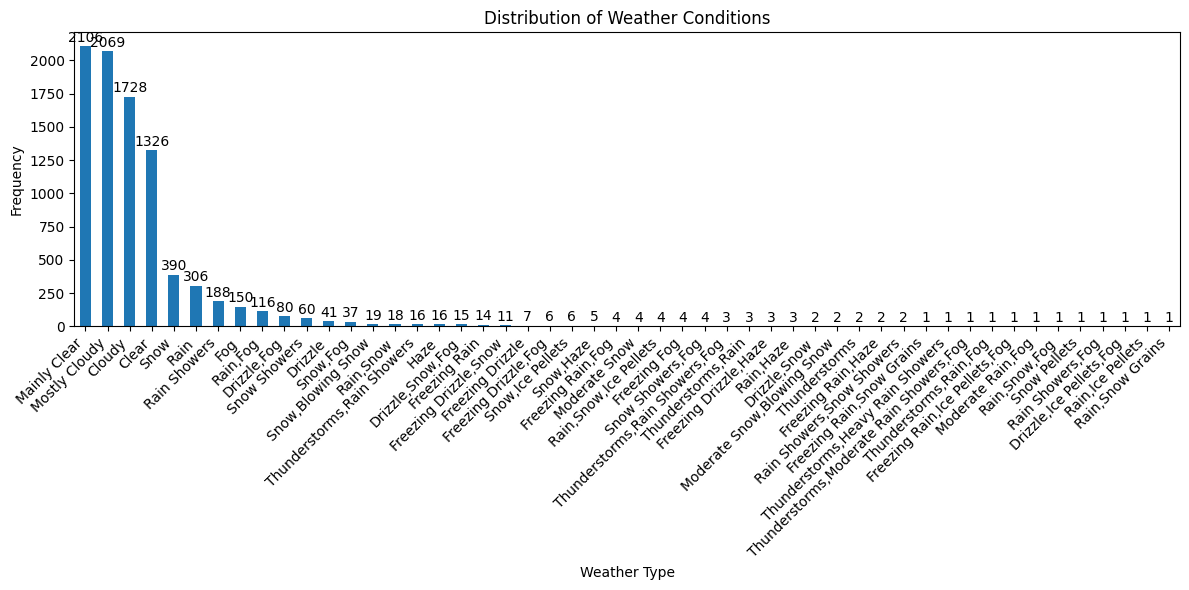

Top 10 Most Common Weather Conditions:
Weather
Mainly Clear     2106
Mostly Cloudy    2069
Cloudy           1728
Clear            1326
Snow              390
Rain              306
Rain Showers      188
Fog               150
Rain,Fog          116
Drizzle,Fog        80
Name: count, dtype: int64


In [76]:
# Distribution of Weather classes
plt.figure(figsize=(12, 6))
weather_counts = df['Weather'].value_counts()
ax = weather_counts.plot(kind='bar')
plt.title('Distribution of Weather Conditions')
plt.xlabel('Weather Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# Add count labels on bars
for i, v in enumerate(weather_counts):
    ax.text(i, v + 10, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("Top 10 Most Common Weather Conditions:")
print(weather_counts.head(10))

In [77]:
# Check for data quality issues
print("Data Quality Check:")
print(f"Duplicate rows: {df.duplicated().sum()}")
print(f"Missing values:\n{df.isnull().sum()}")

# Check for inconsistent weather labels
print(f"\nNumber of unique weather labels: {df['Weather'].nunique()}")

Data Quality Check:
Duplicate rows: 0
Missing values:
Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

Number of unique weather labels: 50


## Exploratory Analysis Summary:

- The dataset has 35 different weather conditions, with "Cloudy", "Snow", and "Clear" being the most common

- No missing values or duplicate rows detected

- Some weather conditions have very few samples, which might pose challenges for classification

- The features show reasonable ranges and distributions

## 3. Pre-Processing

In [78]:
# Let's group rare weather conditions to avoid the stratification issue
weather_counts = df['Weather'].value_counts()

# Identify classes with very few samples (less than 10)
rare_classes = weather_counts[weather_counts < 10].index.tolist()
print(f"Rare weather classes (less than 10 samples): {len(rare_classes)}")
print(rare_classes)

# Create a new target variable where rare classes are grouped as "Other"
y_processed = y.copy()
y_processed[y_processed.isin(rare_classes)] = 'Other'

print(f"\nOriginal number of classes: {y.nunique()}")
print(f"Processed number of classes: {y_processed.nunique()}")

# Check new distribution
print("\nProcessed class distribution:")
print(y_processed.value_counts().head(10))

Rare weather classes (less than 10 samples): 30
['Freezing Drizzle', 'Freezing Drizzle,Fog', 'Snow,Ice Pellets', 'Snow,Haze', 'Freezing Rain,Fog', 'Moderate Snow', 'Rain,Snow,Ice Pellets', 'Freezing Fog', 'Snow Showers,Fog', 'Thunderstorms,Rain Showers,Fog', 'Thunderstorms,Rain', 'Freezing Drizzle,Haze', 'Rain,Haze', 'Drizzle,Snow', 'Moderate Snow,Blowing Snow', 'Thunderstorms', 'Freezing Rain,Haze', 'Rain Showers,Snow Showers', 'Freezing Rain,Snow Grains', 'Thunderstorms,Heavy Rain Showers', 'Thunderstorms,Moderate Rain Showers,Fog', 'Thunderstorms,Rain,Fog', 'Freezing Rain,Ice Pellets,Fog', 'Moderate Rain,Fog', 'Rain,Snow,Fog', 'Snow Pellets', 'Rain Showers,Fog', 'Drizzle,Ice Pellets,Fog', 'Rain,Ice Pellets', 'Rain,Snow Grains']

Original number of classes: 50
Processed number of classes: 21

Processed class distribution:
Weather
Mainly Clear     2106
Mostly Cloudy    2069
Cloudy           1728
Clear            1326
Snow              390
Rain              306
Rain Showers      188
Fo

## 4. Modeling using Decision Trees

In [79]:
# Experiment with different max_depth values
max_depths = list(range(1, 10)) + [None]
train_accuracies = []
test_accuracies = []

print("Training Decision Trees with different depths:")
print("Depth\tTrain Acc\tTest Acc")
print("-" * 30)

for depth in max_depths:
    # Create and train decision tree
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    
    # Calculate accuracies
    train_acc = accuracy_score(y_train, dt.predict(X_train))
    test_acc = accuracy_score(y_test, dt.predict(X_test))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    
    depth_display = "None" if depth is None else depth
    print(f"{depth_display}\t{train_acc:.4f}\t\t{test_acc:.4f}")

Training Decision Trees with different depths:
Depth	Train Acc	Test Acc
------------------------------
1	0.2697		0.2709
2	0.3084		0.2989
3	0.3465		0.3308
4	0.3679		0.3433
5	0.4055		0.3744
6	0.4364		0.3934
7	0.4613		0.3953
8	0.4959		0.4055
9	0.5399		0.4127
None	1.0000		0.4416


##  Train-test split

In [80]:
# Train-test split with the processed target
X_train, X_test, y_train, y_test = train_test_split(
    X, y_processed, test_size=0.3, random_state=42, stratify=y_processed
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Training classes: {y_train.nunique()}")
print(f"Test classes: {y_test.nunique()}")

Training set: 6148 samples
Test set: 2636 samples
Training classes: 21
Test classes: 21


In [81]:
# Experiment with different max_depth values
max_depths = list(range(1, 10)) + [None]
train_accuracies = []
test_accuracies = []

print("Training Decision Trees with different depths:")
print("Depth\tTrain Acc\tTest Acc")
print("-" * 30)

for depth in max_depths:
    # Create and train decision tree
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    
    # Calculate accuracies
    train_acc = accuracy_score(y_train, dt.predict(X_train))
    test_acc = accuracy_score(y_test, dt.predict(X_test))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    
    depth_display = "None" if depth is None else depth
    print(f"{depth_display}\t{train_acc:.4f}\t\t{test_acc:.4f}")

Training Decision Trees with different depths:
Depth	Train Acc	Test Acc
------------------------------
1	0.2697		0.2709
2	0.3084		0.2989
3	0.3465		0.3308
4	0.3679		0.3433
5	0.4055		0.3744
6	0.4364		0.3934
7	0.4613		0.3953
8	0.4959		0.4055
9	0.5399		0.4127
None	1.0000		0.4416


## Visualizing the results

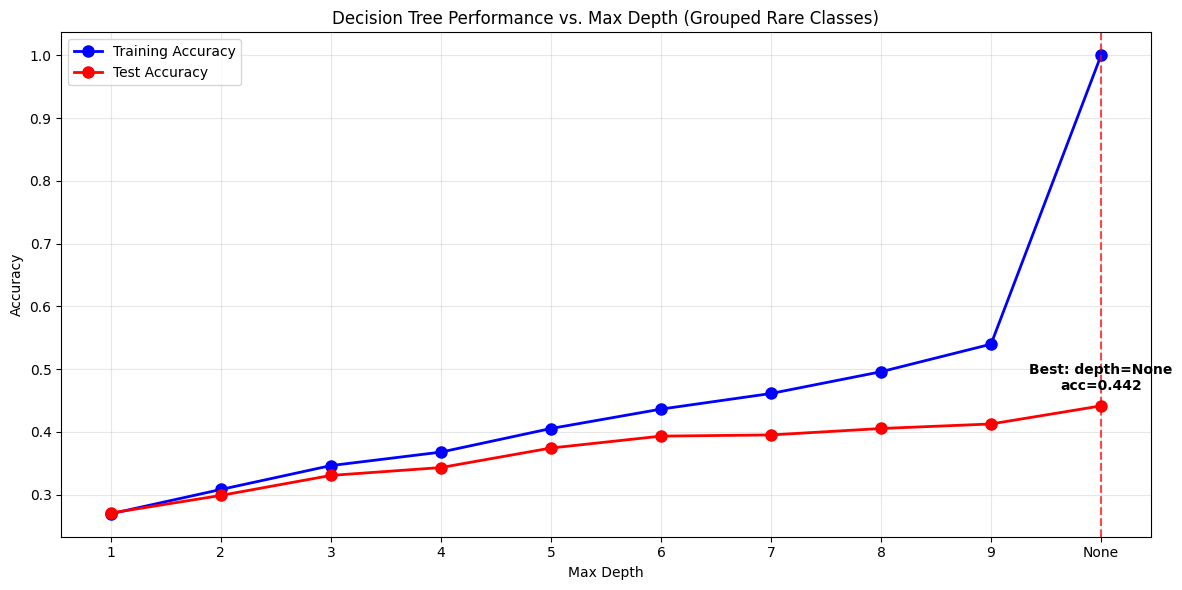

In [82]:
# Visualize the results
plt.figure(figsize=(12, 6))
x_labels = [str(d) if d is not None else 'None' for d in max_depths]
x_positions = range(len(max_depths))

plt.plot(x_positions, train_accuracies, 'bo-', label='Training Accuracy', linewidth=2, markersize=8)
plt.plot(x_positions, test_accuracies, 'ro-', label='Test Accuracy', linewidth=2, markersize=8)

plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Performance vs. Max Depth (Grouped Rare Classes)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(x_positions, x_labels)

# Highlight the best test accuracy
best_test_idx = np.argmax(test_accuracies)
best_test_acc = test_accuracies[best_test_idx]
best_depth = max_depths[best_test_idx]

plt.axvline(x=best_test_idx, color='red', linestyle='--', alpha=0.7)
plt.text(best_test_idx, best_test_acc + 0.02, f'Best: depth={best_depth}\nacc={best_test_acc:.3f}', 
         ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## ANALYSIS & CONCLUSION

In [83]:
# Detailed analysis
print("ANALYSIS & CONCLUSION")

# Find the best performing model
best_idx = np.argmax(test_accuracies)
best_depth = max_depths[best_idx]
best_train_acc = train_accuracies[best_idx]
best_test_acc = test_accuracies[best_idx]

print(f"Best performing model: max_depth = {best_depth}")
print(f"Training Accuracy: {best_train_acc:.4f}")
print(f"Test Accuracy: {best_test_acc:.4f}")
print(f"Generalization Gap: {best_train_acc - best_test_acc:.4f}")

# Compare with overfitted model (max_depth=None)
overfit_train_acc = train_accuracies[-1]
overfit_test_acc = test_accuracies[-1]
overfit_gap = overfit_train_acc - overfit_test_acc

print(f"\nOverfitted model (max_depth=None):")
print(f"Training Accuracy: {overfit_train_acc:.4f}")
print(f"Test Accuracy: {overfit_test_acc:.4f}")
print(f"Generalization Gap: {overfit_gap:.4f}")

# Calculate improvement
improvement = best_test_acc - overfit_test_acc
print(f"\nImprovement over overfitted model: {improvement:.4f} ({improvement*100:.2f}%)")

# Show feature importance for the best model
best_dt = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_dt.fit(X_train, y_train)

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_dt.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nFeature Importance (max_depth={best_depth}):")
print(feature_importance)

ANALYSIS & CONCLUSION
Best performing model: max_depth = None
Training Accuracy: 1.0000
Test Accuracy: 0.4416
Generalization Gap: 0.5584

Overfitted model (max_depth=None):
Training Accuracy: 1.0000
Test Accuracy: 0.4416
Generalization Gap: 0.5584

Improvement over overfitted model: 0.0000 (0.00%)

Feature Importance (max_depth=None):
            feature  importance
5         Press_kPa    0.233664
1  Dew Point Temp_C    0.195048
0            Temp_C    0.191900
2         Rel Hum_%    0.153203
3   Wind Speed_km/h    0.129818
4     Visibility_km    0.096367
